In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import re
from os import listdir
from os.path import isfile, join

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.express as px

In [2]:
import calendar

In [3]:
idx = pd.IndexSlice

***

<a id='opportunities_infos'></a>
# Data collection

In [28]:
op_infos = pd.read_csv(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Salesforce\Data export\IT_Opp_by_Created_Date.csv", encoding='latin-1', sep=";")

In [29]:
for col in op_infos.columns:
    if "Date" in col:
        op_infos[col] = op_infos[col].astype(str)
        op_infos[col] = pd.to_datetime(op_infos[col], format="%d/%m/%Y")
    else:
        pass


columns = [c for c in op_infos.columns if not "Currency" in c]
op_infos = op_infos.loc[:,columns]

num = []

for col in op_infos.columns:
    if "Amount" in col:
        num.append(col)
    else:
        pass
    
op_infos[num] = op_infos[num].apply(lambda x: x.str.replace(",",".", regex=False)).astype(float)

In [30]:
op_infos["Stage Duration"] = op_infos["Stage Duration"].apply(lambda x: x.replace(",",".")).astype(float)
op_infos["Age"] = op_infos["Age"].apply(lambda x: x.replace(",",".")).astype(float)

In [31]:
op_infos["Stage cat"] = pd.Categorical(op_infos["Stage"], ["Qualification","Needs Analysis","Solution Presentation / Demo", "Proposal", "Negotiation","Closed Won", "Closed Lost"])

In [32]:
op_infos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21237 entries, 0 to 21236
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Owner Role               21200 non-null  object        
 1   Opportunity Owner        21237 non-null  object        
 2   Account Name             21237 non-null  object        
 3   Type                     20720 non-null  object        
 4   Opportunity ID           21237 non-null  object        
 5   Opportunity Name         21237 non-null  object        
 6   Stage                    21237 non-null  object        
 7   Stage Duration           21237 non-null  float64       
 8   Subscription Amount      21228 non-null  float64       
 9   Non-Subscription Amount  21167 non-null  float64       
 10  Incremental Amount       20233 non-null  float64       
 11  weighted amount          21237 non-null  object        
 12  Probability (%)          21237 n

In [34]:
op_infos["Owner Role"].unique()

array(['IT Agency and Reseller', 'IT Large Account Sales Team',
       'IT North West Sales Team', 'IT Large Accounts',
       'IT Enterprise Specialists Sales Team', 'IT North East Sales Team',
       'IT Central & South Sales Team', 'IT', 'IT FS Consultant',
       'IT Central & South Manager', 'IT Agency and Reseller Sales Team',
       nan, 'IT North West Manager', 'FREDDI MATTEO Partner Manager',
       'ROCCHI CLAUDIO Partner User', 'TREGNAGHI ENRICO Partner Manager'],
      dtype=object)

In [36]:
op_infos.loc[op_infos["Owner Role"].isin(["IT Agency and Reseller Sales Team"]),:]

,Owner Role,Opportunity Owner,Account Name,Type,Opportunity ID,Opportunity Name,Stage,Stage Duration,Subscription Amount,Non-Subscription Amount,...,weighted amount,Probability (%),Created Date,Close Date,Age,Original Close Date,Last Stage Change Date,Last Modified Date,Lead Source,Stage cat
1587,IT Agency and Reseller Sales Team,Francesca Panetta,F&F Gestioni srl,Existing Business,00607000001t4zO,F&F Gestioni srl-,Closed Lost,286.0,3200.0,0.0,...,"0,00",0,2020-11-10,2021-09-28,322.0,NaT,2021-09-28,2021-09-28,Web forms,Closed Lost
1801,IT Agency and Reseller Sales Team,Elisa Rigo,Lcs impianti sicurezza,New Business,00607000001t3ML,Lcs impianti sicurezza-,Closed Lost,439.0,3000.0,0.0,...,"0,00",0,2020-11-04,2021-04-28,175.0,NaT,2021-04-28,2021-04-28,NaN,Closed Lost
6590,IT Agency and Reseller Sales Team,Elisa Rigo,Cecire Patrizio,New Business,00607000001t30Z,Cecire Patrizio-,Closed Lost,439.0,750.0,0.0,...,"0,00",0,2020-11-03,2021-04-28,176.0,NaT,2021-04-28,2021-04-28,Web forms,Closed Lost
6611,IT Agency and Reseller Sales Team,Elisa Rigo,ALFA LAVAL SPA,New Business,00607000001t3Ha,Alfa Laval Spa-,Closed Lost,439.0,750.0,0.0,...,"0,00",0,2020-11-04,2021-04-28,175.0,NaT,2021-04-28,2021-04-28,Marketing Automation,Closed Lost
19930,IT Agency and Reseller Sales Team,Elisa Rigo,Moreno Moto di Franzoni Moreno,New Business,00607000001t57I,Moreno Moto di Franzoni Moreno-,Closed Lost,434.0,0.0,0.0,...,"0,00",0,2020-11-11,2021-05-03,173.0,NaT,2021-05-03,2021-05-03,Marketing Automation,Closed Lost
20617,IT Agency and Reseller Sales Team,Elisa Rigo,Modulus srls,New Business,00607000001t3xR,Modulus srls-,Closed Lost,434.0,0.0,0.0,...,"0,00",0,2020-11-06,2021-05-03,178.0,NaT,2021-05-03,2021-07-23,Marketing Automation,Closed Lost
21051,IT Agency and Reseller Sales Team,Francesco Florio,IPSODEA SRL,NaN,00607000001ukdd,STUDIO LUMIA-,Qualification,278.0,0.0,0.0,...,"0,00",10,2021-10-06,2021-12-31,278.0,NaT,NaT,2021-10-06,Marketing Automation,Qualification


***

<a id='opportunities_infos'></a>
# Analisi per stage

In [37]:
owner_role = ['IT North West Sales Team', 'IT North East Sales Team', 'IT Enterprise Specialists Sales Team', 'IT Central & South Sales Team', 'IT Large Account Sales Team','IT Agency and Reseller']
filt = op_infos["Owner Role"].isin(owner_role)

op_infos_sintesi = op_infos.loc[filt,:].sort_values(['Stage cat']).groupby(["Stage cat", "Owner Role"]).agg({"Stage Duration":"mean", "Age":"mean", "Opportunity Name":"count", "Incremental Amount":"sum"}).rename(columns={"Opportunity Name":"N. Opportunità"}).unstack(level=1)

In [70]:
op_infos_sintesi

Stage Duration  \
Owner Role                   IT Central & South Sales Team   
Stage cat                                                    
Qualification                                   137.517730   
Needs Analysis                                    6.000000   
Solution Presentation / Demo                    179.065657   
Proposal                                        168.410138   
Negotiation                                     210.789474   
Closed Won                                      246.374014   
Closed Lost                                     225.249370   

                                                                   \
Owner Role                   IT Enterprise Specialists Sales Team   
Stage cat                                                           
Qualification                                           52.735294   
Needs Analysis                                           3.500000   
Solution Presentation / Demo                           116.344262   
Proposal                                                96.631579   
Negotiation                                             90.157895   
Closed Won                                             259.387036   
Closed Lost                                            212.605941   

                                                          \
Owner Role                   IT Large Account Sales Team   
Stage cat                                                  
Qualification                                 179.947368   
Needs Analysis                                234.000000   
Solution Presentation / Demo                  204.500000   
Proposal                                      449.666667   
Negotiation                                          NaN   
Closed Won                                    297.550847   
Closed Lost                                   254.057692   

                                                       \
Owner Role                   IT North East Sales Team   
Stage cat                                               
Qualification                              120.000000   
Needs Analysis                               1.000000   
Solution Presentation / Demo               100.731959   
Proposal                                   120.700787   
Negotiation                                 51.642857   
Closed Won                                 231.944994   
Closed Lost                                221.704671   

                                                       \
Owner Role                   IT North West Sales Team   
Stage cat                                               
Qualification                              117.605556   
Needs Analysis                               6.250000   
Solution Presentation / Demo               127.942308   
Proposal                                   133.491003   
Negotiation                                 75.205882   
Closed Won                                 238.511597   
Closed Lost                                207.590371   

                                                       Age  \
Owner Role                   IT Central & South Sales Team   
Stage cat                                                    
Qualification                                   140.773050   
Needs Analysis                                    6.000000   
Solution Presentation / Demo                    196.080808   
Proposal                                        174.751152   
Negotiation                                     228.421053   
Closed Won                                       15.343296   
Closed Lost                                      95.171285   

                                                                   \
Owner Role                   IT Enterprise Specialists Sales Team   
Stage cat                                                           
Qualification                                           57.220588   
Needs Analysis                                           3.500000   
Solution Presentation /

<a id='created_date'></a>
# Opportunities by created date

In [38]:
owner_role = ['IT North West Sales Team', 'IT North East Sales Team', 'IT Enterprise Specialists Sales Team', 'IT Central & South Sales Team', 'IT Large Account Sales Team', 'IT Large Accounts','IT Agency and Reseller']
filt = op_infos["Owner Role"].isin(owner_role)

opportunities = op_infos.loc[filt,:]

In [39]:
op_infos_by_created_date = opportunities.sort_values(['Stage cat']).groupby([op_infos["Created Date"].astype('datetime64[M]'), op_infos["Close Date"].astype('datetime64[M]'), "Stage"]).agg({"Opportunity ID":"nunique",  "Incremental Amount":"sum", "Stage Duration":"mean", "Age":"mean"}).reset_index()

In [40]:
op_infos_by_created_date.to_excel(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Presentazioni\Sales\EU Sales review\SI_opportunities - op_infos_by_created_date.xlsx", index=False)

***

In [84]:
pipe_6m = op_infos_by_created_date.loc[(op_infos_by_created_date["Created Date"] >= "2022-01-01")&\
                                       (op_infos_by_created_date["Close Date"] >= "2022-07-01")&\
                                       (op_infos_by_created_date["Close Date"] <= "2022-12-01")&\
                                       (op_infos_by_created_date["Stage"].isin(["Qualification","Needs Analysis","Solution Presentation / Demo", "Proposal", "Negotiation"])),:].groupby(["Close Date", "Stage"], dropna=False).agg({"Incremental Amount":"sum"}).reset_index()

pipe_6m["Opportunities created date"] = "Last 6 month"

pipe_all = op_infos_by_created_date.loc[(op_infos_by_created_date["Close Date"] >= "2022-07-01")&\
                                        (op_infos_by_created_date["Close Date"] <= "2022-12-01")&\
                                        (op_infos_by_created_date["Stage"].isin(["Qualification","Needs Analysis","Solution Presentation / Demo", "Proposal", "Negotiation"])),:].groupby(["Close Date", "Stage"], dropna=False).agg({"Incremental Amount":"sum"}).reset_index()

pipe_all["Opportunities created date"] = "All time"

pipeline_value = pd.concat([pipe_6m,pipe_all], axis=0)

pipeline_value.rename(columns={"Incremental Amount":"Pipeline Value"}, inplace=True)

In [86]:
pipeline_value["Close Date"] = pipeline_value["Close Date"].dt.strftime('%B')

In [87]:
pipeline_value

,Close Date,Stage,Pipeline Value,Opportunities created date
0,July,Needs Analysis,805.00,Last 6 month
1,July,Negotiation,146404.33,Last 6 month
2,July,Proposal,483798.00,Last 6 month
3,July,Qualification,78815.33,Last 6 month
4,July,Solution Presentation / Demo,464965.00,Last 6 month
5,August,Negotiation,5000.00,Last 6 month
6,August,Proposal,2675.00,Last 6 month
7,August,Qualification,2850.00,Last 6 month
8,August,Solution Presentation / Demo,30850.00,Last 6 month
9,September,Needs Analysis,2000.00,Last 6 month


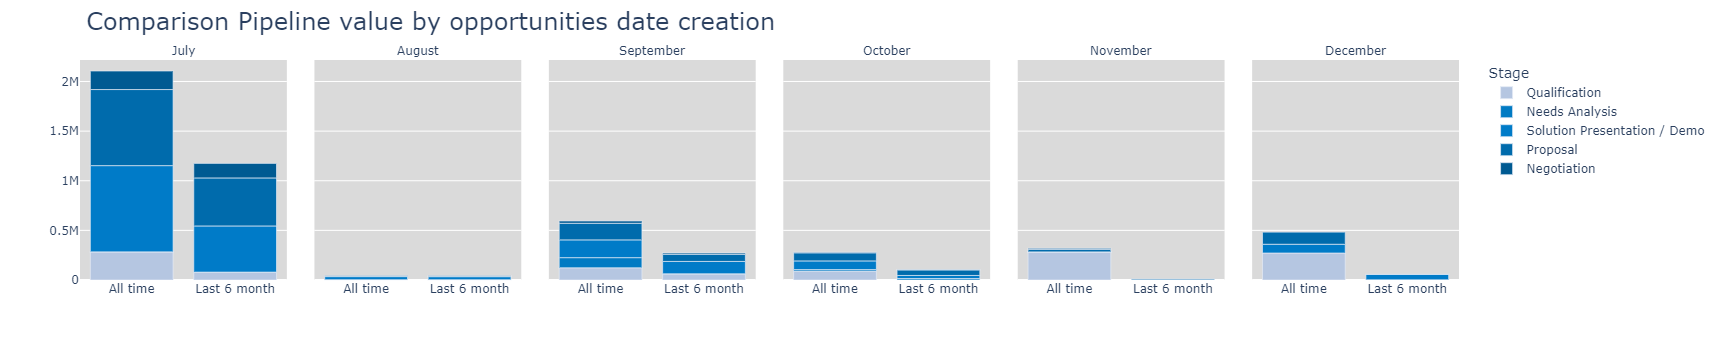

'C:\\Users\\Raffaele.Sportiello\\OneDrive - Wolters Kluwer\\Documents\\Salesforce\\pipeline_value.html'

In [99]:
fig = px.bar(pipeline_value, x="Opportunities created date", 
             y="Pipeline Value", 
             #facet_row="Close Date", 
             facet_col="Close Date", 
             facet_col_wrap=10,
             color="Stage" ,
             color_discrete_map={
                 "Negotiation": "#005A92",
                 "Proposal": "#006BAC",
                 "Solution Presentation / Demo":"#007BC8",
                 "Needs Analysis":"#007AC3",
                 "Qualification":"#B5C6E1"},
             category_orders={"Opportunities created date": ["All time", "Last 6 month"],
                             "Stage":["Qualification","Needs Analysis","Solution Presentation / Demo", "Proposal", "Negotiation"]}
            )


fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))


fig.update_layout(dict(
    title=dict(text="Comparison Pipeline value by opportunities date creation",
               pad=dict(b=500),
               font=dict(size=24)),
    plot_bgcolor="#DADADA")
                 )

# hide subplot y-axis titles and x-axis titles
for axis in fig.layout:
    if type(fig.layout[axis]) == go.layout.YAxis:
        fig.layout[axis].title.text = ''
    if type(fig.layout[axis]) == go.layout.XAxis:
        fig.layout[axis].title.text = ''

fig.show()

pyo.plot(fig, filename=r'C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Salesforce\pipeline_value.html')

<a id='close_date_estimated'></a>
# Opportunities by estimated close date

In [36]:
op_infos_close_date = op_infos.groupby([op_infos["Close Date"].astype('datetime64[M]'), "Stage cat"]).agg({"Opportunity ID":"nunique", "Incremental Amount":"sum"})

op_infos_close_date.index.set_names({"Stage cat":"Stage"}, inplace=True)

op_infos_close_date = op_infos_close_date.rename(columns={'Opportunity ID':'Opportunities'})

#op_infos_close_date.index = op_infos_close_date.index.set_levels([op_infos_close_date.index.levels[0].strftime('%B-%Y'), op_infos_close_date.index.levels[1]])

In [ ]:
idx_stages = ["Qualification", "Needs Analysis", "Solution Presentation / Demo", "Proposal", "Negotiation"]

idx_columns = idx["Opportunities","Incremental Amount"]

op_infos_close_date_est = op_infos_close_date.loc[idx["2022-06-01":"2022-12-01",idx_stages], idx_columns]

In [ ]:
stack_bar = op_infos_close_date_est.loc[:,["Opportunities"]].unstack()
stack_bar.columns = stack_bar.columns.droplevel(0)

In [ ]:
fig, ax = plt.subplots(2,1,figsize=[10,10])

for col in stack_bar.columns:
    ax[0].bar(x=stack_bar.index, height= stack_bar[col], width=20)

In [ ]:
op_infos_gr_exp.reset_index().to_excel(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Salesforce\Reports\IT_Opp_infos.xlsx", index=False)

***

<a id='win_rate'></a>
# Win rate

[Vai all'indice](#top)  

In [53]:
op_infos["N. Opp. Created by Month"] = op_infos.groupby([op_infos["Created Date"].astype('datetime64[M]')])["Opportunity ID"].transform("nunique")

In [74]:
op_infos_gr = op_infos.sort_values(['Stage cat']).groupby([op_infos["Created Date"].astype('datetime64[M]'), op_infos["Close Date"].astype('datetime64[M]'), "Stage"]).agg({"Opportunity ID":"nunique", "N. Opp. Created by Month":"max", "Incremental Amount":"sum", "Stage Duration":"mean", "Age":"mean"})

#op_infos_gr.index.set_names({"Stage cat":"Stage"}, inplace=True)

op_infos_gr["% Stage Rate"] = (op_infos_gr["Opportunity ID"] / op_infos_gr["N. Opp. Created by Month"])

In [34]:
op_infos_gr_exp = op_infos_gr.copy()
op_infos_gr_exp.index = op_infos_gr_exp.index.set_levels([op_infos_gr_exp.index.levels[0].strftime('%B-%Y'), op_infos_gr_exp.index.levels[1].strftime('%B-%Y'), op_infos_gr_exp.index.levels[2]])

op_infos_gr_exp = op_infos_gr_exp.rename(columns={'Opportunity ID':'Opportunities'})

***

<a id='win_rate'></a>
# TOOLTIPS: Insert a total row on groupby

In [ ]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
               'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
               'C' : np.random.randn(8),
               'D' : np.random.randn(8)})

df.B = pd.Categorical(df.B, 
                      categories=np.append(df.B.unique(), 'Total'))

v = df.groupby(by=['A', 'B']).sum()

v.loc(axis=0)[pd.IndexSlice[:,'Total']] = v.groupby(level=0).sum().values

In [ ]:
op_infos["Stage"] = pd.Categorical(op_infos["Stage"], 
                      categories=np.append(op_infos["Stage"].unique(), 'Total'))

prova_gr = op_infos.groupby([op_infos["Created Date"].astype('datetime64[M]'), op_infos["Close Date"].astype('datetime64[M]'), "Stage"]).agg({"Opportunity Name":"count", "Month Op. Created":"max", "Incremental Amount":"sum"})

prova_gr["% Stage Rate"] = (prova_gr["Opportunity Name"] / prova_gr["Month Op. Created"])

prova_gr.loc(axis=0)[idx[:,:,"Total"]] = prova_gr.groupby(["Created Date", "Close Date"]).sum().values


prova_gr.index = prova_gr.index.set_levels([prova_gr.index.levels[0].strftime('%B-%Y'), prova_gr.index.levels[1].strftime('%B-%Y'), prova_gr.index.levels[2]])

def df_style(val):
    return "font-weight: bold"

prova_gr.loc[idx[:,:,["Closed Lost", "Closed Won", "Total"]], idx["Opportunity Name","Incremental Amount", "% Stage Rate"]].rename(columns={'Opportunity Name':'Opportunities'}).style.format({"Opportunities":"{:,.0f}","Incremental Amount":"{:,.0f}", "% Stage Rate": "{:.2%}"}).background_gradient(subset=["% Stage Rate"]).applymap(df_style, subset=idx[:,:,"Total"])

---